In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.datasets import make_classification
from sklearn.svm import SVC

In [3]:
matplotlib_axes_logger.setLevel('ERROR')

In [4]:
zero_one_colormap_pts = ListedColormap(('red','green'))
zero_one_colourmap_boundary = ListedColormap(('#FFCCCB','#90EE90'))

In [12]:
def plot_decision_boundary(X, y, clf,gamma,accuracy):
    X_set, y_set = X, y
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, 
                                     stop = X_set[:, 0].max() + 1, 
                                     step = 0.01),
                           np.arange(start = X_set[:, 1].min() - 1, 
                                     stop = X_set[:, 1].max() + 1, 
                                     step = 0.01))
    plt.figure(figsize=(10,6))
    plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), 
                                                 X2.ravel()]).T).reshape(X1.shape),
                   alpha = 0.75, 
                   cmap = zero_one_colourmap_boundary)
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c = (zero_one_colormap_pts)(i), label = j)
    plt.title('Gamma = {} Accuracy={}'.format(gamma,accuracy))
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    return plt.show()

In [26]:
def plot_decision_boundary1(X, y, clf,gamma,c,accuracy):
    X_set, y_set = X, y
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, 
                                     stop = X_set[:, 0].max() + 1, 
                                     step = 0.01),
                           np.arange(start = X_set[:, 1].min() - 1, 
                                     stop = X_set[:, 1].max() + 1, 
                                     step = 0.01))
    plt.figure(figsize=(10,6))
    plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), 
                                                 X2.ravel()]).T).reshape(X1.shape),
                   alpha = 0.75, 
                   cmap = zero_one_colourmap_boundary)
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c = (zero_one_colormap_pts)(i), label = j)
    plt.title('Gamma = {}  C={}  Accuracy={}'.format(gamma,c,accuracy))
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    return plt.show()

In [14]:
def generate_clf(input_gamma,input_C=1):
    classifier = SVC(kernel="poly",gamma=input_gamma,C=input_C)
    classifier.fit(X,y.ravel())
    y_pred = classifier.predict(X)
    print("Training Accuracy = {}".format(accuracy_score(y_pred,y)))
    return classifier,accuracy_score(y_pred,y)

In [15]:
X,y =make_classification(n_samples=200,n_features=2,
n_informative=2,n_redundant=0,n_repeated=0,n_classes=2,random_state=44)

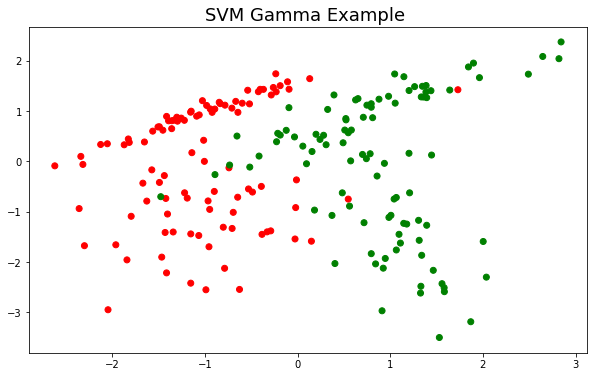

In [16]:
plt.figure(figsize=(10,6))
plt.title("SVM Gamma Example ",fontsize=18)
plt.scatter(X[:,0],X[:,1],c=y,cmap=zero_one_colormap_pts)

## Classifier 1 - Gamma = 0.001

In [17]:
classifier_1,accuracy = generate_clf(0.001)

Training Accuracy = 0.505


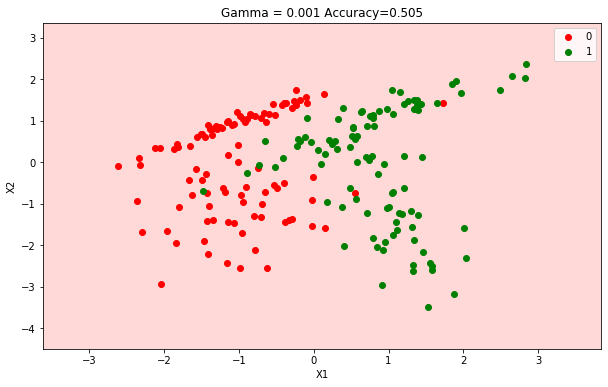

In [18]:
plot_decision_boundary(X,y,classifier_1,0.001,accuracy)

## Classifier2 - Gamma = 0.01

Training Accuracy = 0.505


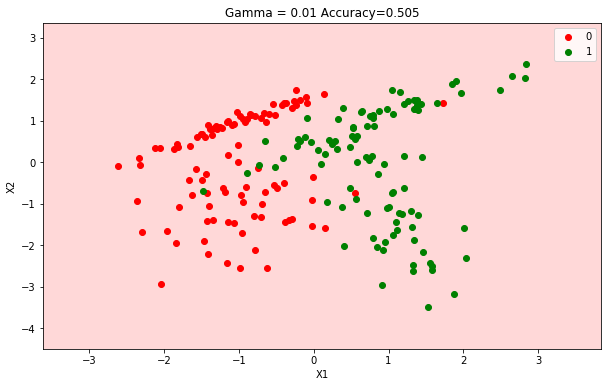

In [20]:
classifier_2,accuracy = generate_clf(0.01)
plot_decision_boundary(X,y,classifier_2,0.01,accuracy)

## Classifer3 - Gamma = 0.1

Training Accuracy = 0.795


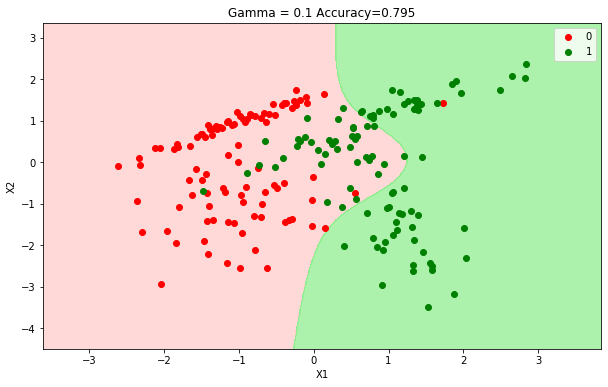

In [21]:
classifier_3,accuracy = generate_clf(0.1)
plot_decision_boundary(X,y,classifier_3,0.1,accuracy)

## Classifer4 - Gamma = 1

Training Accuracy = 0.93


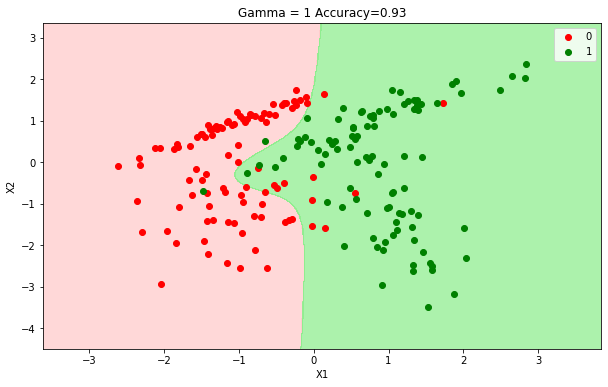

In [23]:
classifier_4,accuracy = generate_clf(1)
plot_decision_boundary(X,y,classifier_4,1,accuracy)

## Classifier5 - Gamma = 0.1 & C=0.1

Training Accuracy = 0.605


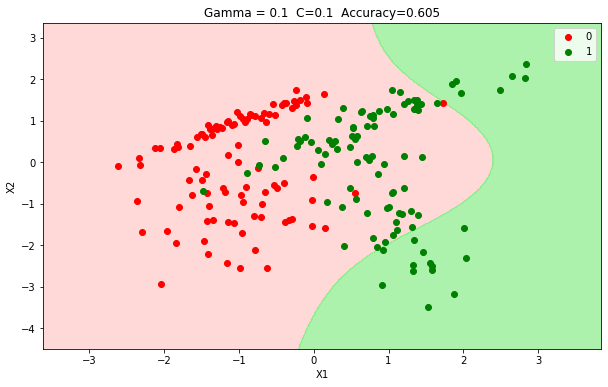

In [27]:
classifier_5,accuracy = generate_clf(0.1,0.1)
plot_decision_boundary1(X,y,classifier_5,0.1,0.1,accuracy)

## Classifier6 - Gamma = 0.1 & C=1

Training Accuracy = 0.795


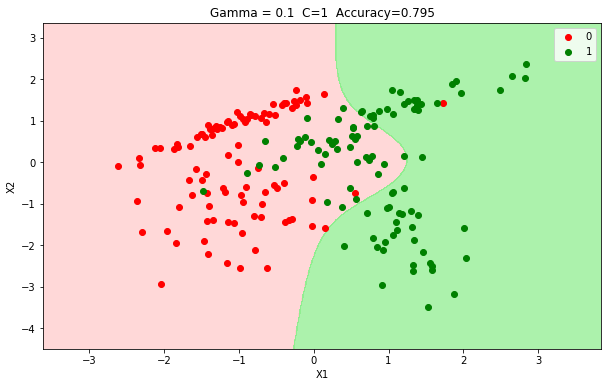

In [28]:
classifier_6,accuracy = generate_clf(0.1,1)
plot_decision_boundary1(X,y,classifier_6,0.1,1,accuracy)

## Classifier7 - Gamma = 0.1 & C=10

Training Accuracy = 0.94


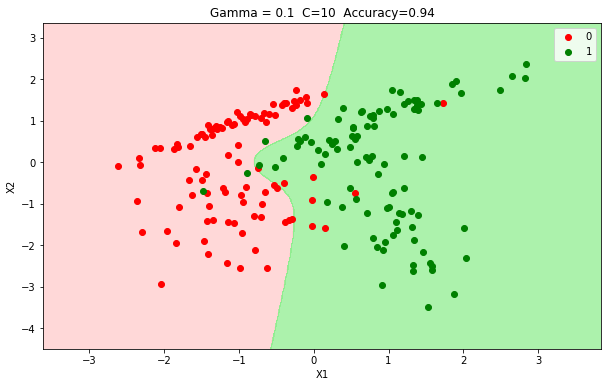

In [29]:
classifier_7,accuracy = generate_clf(0.1,10)
plot_decision_boundary1(X,y,classifier_7,0.1,10,accuracy)